## Attribute Information

1) App: Application name
2) Category: Category the app belongs to
3) Rating: Overall user rating of the app (as when scraped)
4) Reviews: Number of user reviews for the app (as when scraped)
5) Size: Size of the app (as when scraped)
6) Installs: Number of user downloads/installs for the app (as when scraped)
7) Type: Paid or Free
8) Price: Price of the app (as when scraped)
9) Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10) Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11) Last Updated: Date when the app was last updated on Play Store (as when scraped)
12) Current Ver: Current version of the app available on Play Store (as when scraped)
13) Android Ver: Min required Android version (as when scraped)

### STEP 1) IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### STEP 2) READING DATA

In [2]:
data=pd.read_csv(r"C:\Users\111\Desktop\Projects\Google Play Store Apps Rating Predictor\googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### As the dataset has the output variable in terms of 1 and 0 hence it is a supervised classification problem

### Check for invalid entries since data is huge

In [3]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### It can be seen that the row has an orientation issue hence we need to shift it

In [4]:
data.iloc[10472,1:]=data.iloc[10472,1:].shift(1)

In [5]:
data.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                             None
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

### STEP 3) EDA

### 3.1) CHECKING SHAPE OF DATA

In [6]:
data.shape

(10841, 13)

### 3.2) DATA TYPE CHECK

In [7]:
data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

#### Reviews,Size,Installs,Rating,Last Updated and Price are of wrong datatypes

### 3.2.1) Price

In [8]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

#### We can see that the dollar sign '$' is making the column's datatype 'Object' instead of 'Float' hence we will remove it

In [9]:
def remove_dollar(x):
    if x=='0':
        return 0
    else:
        return x[1:]
data['Price'] = data['Price'].apply(remove_dollar)

In [10]:
data['Price'].unique()

array([0, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [11]:
data['Price'].dtype

dtype('O')

#### Converting datatype to float

In [12]:
data['Price']=data['Price'].astype(float)

In [13]:
data['Price'].dtype

dtype('float64')

In [14]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### 3.2.2) Rating

In [15]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

####  We can see that  '1.9' is making the column's datatype 'Object' instead of 'Float' hence we will replace it by 1.9

In [16]:
data[data['Rating']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,None,1.9,19.0,3.0M,"1,000+",Free,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [17]:
data['Rating'].replace('1.9',1.9,inplace=True)

In [18]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [19]:
data['Rating'].dtype

dtype('float64')

### 3.2.3) Reviews

In [20]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

#### Converting datatype to float

In [21]:
data['Reviews']=data['Reviews'].astype(float)

In [22]:
data['Reviews'].dtype

dtype('float64')

### 3.2.4) Size

In [23]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [24]:
data['Size'].dtype

dtype('O')

#### Converting KB to MB and removing M and K to convert data type from 'Object' to 'Float'

In [25]:
float(data['Size'][0][0:-1])

19.0

In [26]:
def KB_TO_MB(x):
    if 'M' in x:
        return float(x[0:-1])
    else:
        mb=float(x[0:-1])/1024
        mb=np.round(mb,2)
        return mb

#### Since the value 'Varies with device' was preventing us from calculating mean hence we removed it and stored data in a new dataframe to calculate Median

In [27]:
data_without_varieswithdevice=data[data['Size']!='Varies with device']
data_without_varieswithdevice['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10835    9.6M
10836     53M
10837    3.6M
10838    9.5M
10840     19M
Name: Size, Length: 9146, dtype: object

In [28]:
data_without_varieswithdevice['Size'] = data_without_varieswithdevice['Size'].apply(KB_TO_MB)

<ipython-input-28-df5194e7e69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_varieswithdevice['Size'] = data_without_varieswithdevice['Size'].apply(KB_TO_MB)


In [29]:
data_without_varieswithdevice['Size'].median()

13.0

In [30]:
data_without_varieswithdevice['Size'].mean()

21.514150448283402

#### As Mean>Median hence the distribution is rightly skewed and we will use median to replace 'Varies with device' value

In [31]:
data['Size'].replace('Varies with device','13M',inplace=True)

In [32]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '13M', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M',
       '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
     

In [33]:
data['Size'] = data['Size'].apply(KB_TO_MB)

In [34]:
data['Size'].unique()

array([1.9e+01, 1.4e+01, 8.7e+00, 2.5e+01, 2.8e+00, 5.6e+00, 2.9e+01,
       3.3e+01, 3.1e+00, 2.8e+01, 1.2e+01, 2.0e+01, 2.1e+01, 3.7e+01,
       2.7e+00, 5.5e+00, 1.7e+01, 3.9e+01, 3.1e+01, 4.2e+00, 7.0e+00,
       2.3e+01, 6.0e+00, 6.1e+00, 4.6e+00, 9.2e+00, 5.2e+00, 1.1e+01,
       2.4e+01, 1.3e+01, 9.4e+00, 1.5e+01, 1.0e+01, 1.2e+00, 2.6e+01,
       8.0e+00, 7.9e+00, 5.6e+01, 5.7e+01, 3.5e+01, 5.4e+01, 2.0e-01,
       3.6e+00, 5.7e+00, 8.6e+00, 2.4e+00, 2.7e+01, 2.5e+00, 1.6e+01,
       3.4e+00, 8.9e+00, 3.9e+00, 2.9e+00, 3.8e+01, 3.2e+01, 5.4e+00,
       1.8e+01, 1.1e+00, 2.2e+00, 4.5e+00, 9.8e+00, 5.2e+01, 9.0e+00,
       6.7e+00, 3.0e+01, 2.6e+00, 7.1e+00, 3.7e+00, 2.2e+01, 7.4e+00,
       6.4e+00, 3.2e+00, 8.2e+00, 9.9e+00, 4.9e+00, 9.5e+00, 5.0e+00,
       5.9e+00, 7.3e+01, 6.8e+00, 3.5e+00, 4.0e+00, 2.3e+00, 7.2e+00,
       2.1e+00, 4.2e+01, 7.3e+00, 9.1e+00, 5.5e+01, 2.0e-02, 6.5e+00,
       1.5e+00, 7.5e+00, 5.1e+01, 4.1e+01, 4.8e+01, 8.5e+00, 4.6e+01,
       8.3e+00, 4.3e

### 3.2.5) Installs

In [35]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

#### We can see that the ',' and '+' are making the column's datatype 'Object' instead of 'Float' hence we will replace them with empty space

In [36]:
def remove_pluscomma(x):
    x=x.replace(',','')
    return int(x.replace('+',''))

In [37]:
data['Installs']=data['Installs'].apply(remove_pluscomma)

In [38]:
data['Installs'].dtype

dtype('int64')

In [39]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

### 3.2.6) Last Updated

In [40]:
data['Last Updated'].dtype

dtype('O')

In [41]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

#### Changing last updated datatype from object to datetime

In [42]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

In [43]:
data['Last Updated'].dtype

dtype('<M8[ns]')

### Checking Datatypes again

In [44]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

#### Now the datatypes are correct

### 3.3) FEATURE ENGINEERING

#### We can see that we can apply feature engineering on Last updated column and extract two new columns of month and year that will help us in visualization

In [46]:
data['Year']=data['Last Updated'].dt.year
data['Month']=data['Last Updated'].dt.month

In [47]:
data.shape

(10841, 15)

In [48]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


### 3.4) OUTLIERS CHECK

#### We can check for outliers in Size,Reviews,Ratings & Installs

### 3.4.1) Size

In [357]:
data1=data.copy()

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

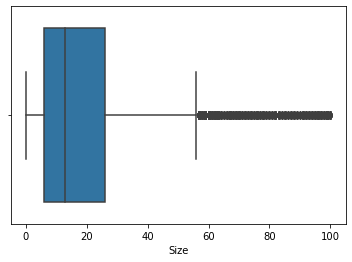

In [358]:
sns.boxplot(data1['Size'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

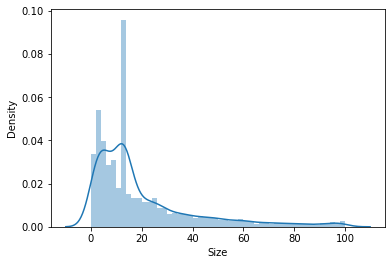

In [359]:
sns.distplot(data1['Size'])

In [360]:
data1['Size'].describe()

count    10841.000000
mean        20.182955
std         20.976790
min          0.010000
25%          5.900000
50%         13.000000
75%         26.000000
max        100.000000
Name: Size, dtype: float64

In [361]:
def outliers_size(Q3,Q1):
    IQR=Q3-Q1
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("IQR is",IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_size(26,5.9)

IQR is 20.1
Lower bound: -24.25
Upper bound: 56.150000000000006


In [362]:
a=data1["Size"]
count=0
for i in a:
    if i>56.15 or i<-24.25:
        count=count+1
print("total outliers in size are:",count)
percentage_of_sizeoutliers=(count/10841)*100 
print("percentage of size outliers are:",percentage_of_sizeoutliers)

total outliers in size are: 873
percentage of size outliers are: 8.052762660271192


#### We are replacing outliers with median

In [363]:
for size in data1['Size']:
    if size>56.15 or size<-24.25:
        data1['Size']=data1['Size'].replace(size,np.median(data1['Size']))
    else:
        continue

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

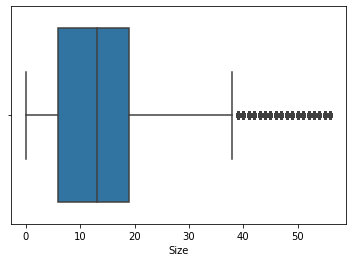

In [364]:
sns.boxplot(data1['Size'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

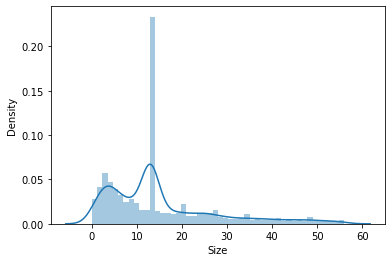

In [365]:
sns.distplot(data1['Size'])

In [366]:
data1['Size'].describe()

count    10841.000000
mean        15.100767
std         12.292720
min          0.010000
25%          5.900000
50%         13.000000
75%         19.000000
max         56.000000
Name: Size, dtype: float64

In [367]:
outliers_size(19,5.9)

IQR is 13.1
Lower bound: -13.749999999999998
Upper bound: 38.65


In [368]:
a1=data1["Size"]
count=0
for i in a1:
    if i>38.65 or i<-13.749999999999998:
        count=count+1
print("total outliers in size are:",count)
percentage_of_sizeoutliers=(count/10841)*100 
print("percentage of size outliers are:",percentage_of_sizeoutliers)

total outliers in size are: 800
percentage of size outliers are: 7.379393044922056


In [369]:
for size1 in data1['Size']:
    if size1>38.65 or size1<-13.749999999999998:
        data1['Size']=data1['Size'].replace(size1,np.median(data1['Size']))
    else:
        continue

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

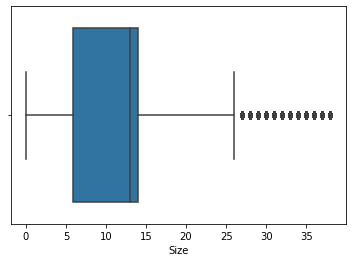

In [370]:
sns.boxplot(data1['Size'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

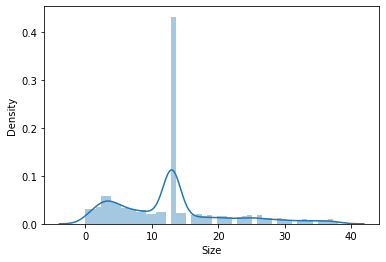

In [371]:
sns.distplot(data1['Size'])

In [372]:
data['Size']=np.log1p(data['Size'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

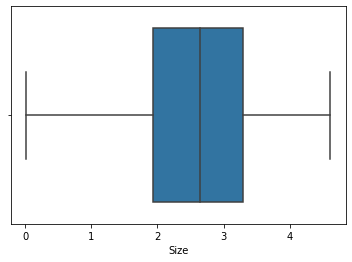

In [373]:
sns.boxplot(data['Size'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

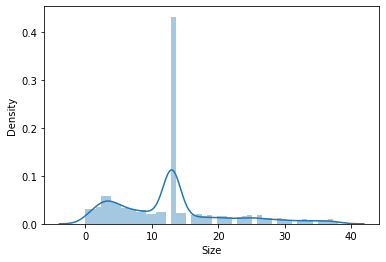

In [374]:
sns.distplot(data1['Size'])

In [375]:
data["Size"].describe()

count    10841.000000
mean         2.611446
std          0.977024
min          0.009950
25%          1.931521
50%          2.639057
75%          3.295837
max          4.615121
Name: Size, dtype: float64

### 3.4.2) Reviews

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

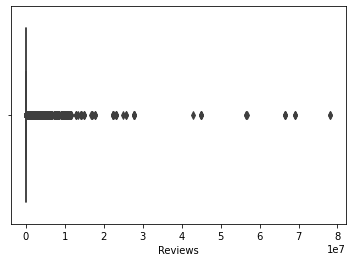

In [267]:
sns.boxplot(data['Reviews'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

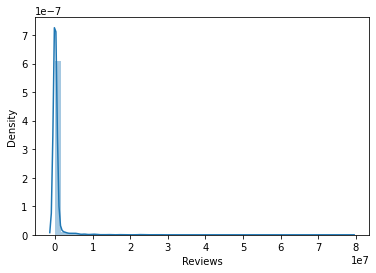

In [268]:
sns.distplot(data['Reviews'])

In [269]:
data['Reviews'].describe()

count    1.084100e+04
mean     4.441119e+05
std      2.927629e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.476800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [270]:
def outliers_reviews(Q3,Q1):
    IQR=Q3-Q1
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("IQR is",IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_reviews(5.476800e+04,3.800000e+01)

IQR is 54730.0
Lower bound: -82057.0
Upper bound: 136863.0


In [271]:
b=data["Reviews"]
count=0
for i in b:
    if i>136863.0 or i<-82057.0:
        count=count+1
print("total outliers in reviews are:",count)
percentage_of_reviewsoutliers=(count/10841)*100 
print("percentage of reviews outliers are:",percentage_of_reviewsoutliers)

total outliers in reviews are: 1925
percentage of reviews outliers are: 17.756664514343694


#### Due to lots of right skewness we can apply Log transformation to remove this positive skewness(high outliers)

In [272]:
data['Reviews']=np.log1p(data['Reviews'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

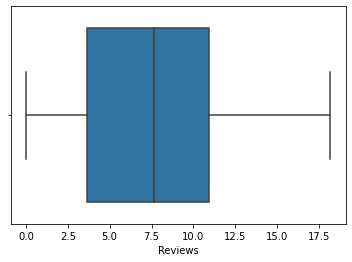

In [273]:
sns.boxplot(data['Reviews'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

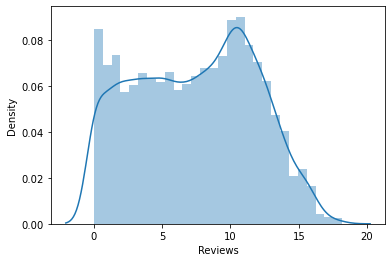

In [274]:
sns.distplot(data['Reviews'])

In [275]:
data['Reviews'].describe()

count    10841.000000
mean         7.394660
std          4.381668
min          0.000000
25%          3.663562
50%          7.647309
75%         10.910880
max         18.174247
Name: Reviews, dtype: float64

### 3.4.3) Rating

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

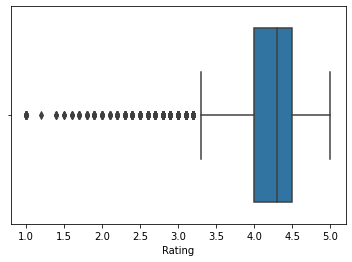

In [276]:
sns.boxplot(data['Rating'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

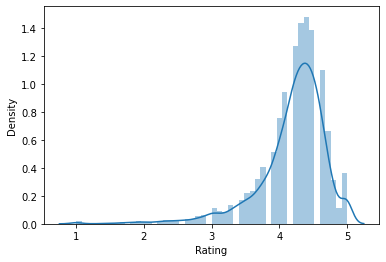

In [277]:
sns.distplot(data['Rating'])

In [278]:
data['Rating'].describe()

count    9367.000000
mean        4.191513
std         0.515735
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [279]:
def outliers_rating(Q3,Q1):
    IQR=Q3-Q1
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("IQR is",IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_rating(4.5,4)

IQR is 0.5
Lower bound: 3.25
Upper bound: 5.25


In [280]:
c=data["Rating"]
count=0
for i in c:
    if i>5.25 or i<3.25:
        count=count+1
print("total outliers in rating are:",count)
percentage_of_ratingoutliers=(count/10841)*100 
print("percentage of rating outliers are:",percentage_of_ratingoutliers)

total outliers in rating are: 504
percentage of rating outliers are: 4.649017618300895


#### We are replacing outliers with median

In [281]:
for rating in data['Rating']:
    if rating>5.25 or rating<3.25:
        data['Rating']=data['Rating'].replace(rating,np.median(data['Rating']))
    else:
        continue

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

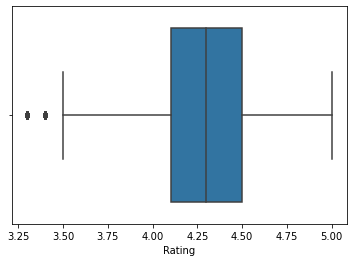

In [282]:
sns.boxplot(data['Rating'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

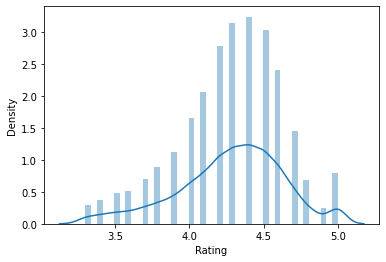

In [283]:
sns.distplot(data['Rating'])

In [284]:
data['Rating'].describe()

count    8863.000000
mean        4.277446
std         0.357696
min         3.300000
25%         4.100000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### 3.4.4) Installs

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

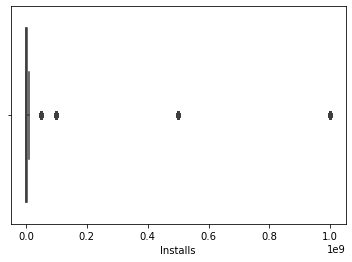

In [285]:
sns.boxplot(data['Installs'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

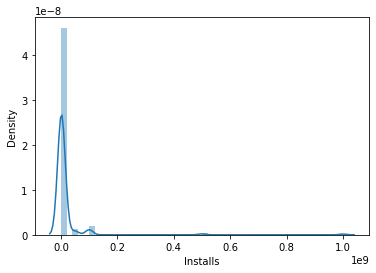

In [286]:
sns.distplot(data['Installs'])

In [287]:
data['Installs'].describe()

count    1.084100e+04
mean     1.546291e+07
std      8.502557e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [288]:
def outliers_installs(Q3,Q1):
    IQR=Q3-Q1
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("IQR is",IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_installs(5.000000e+06,1.000000e+03)

IQR is 4999000.0
Lower bound: -7497500.0
Upper bound: 12498500.0


In [289]:
d=data["Installs"]
count=0
for i in d:
    if i>12498500.0 or i<-7497500.0:
        count=count+1
print("total outliers in installs are:",count)
percentage_of_installoutliers=(count/10841)*100 
print("percentage of installs outliers are:",percentage_of_installoutliers)

total outliers in installs are: 828
percentage of installs outliers are: 7.637671801494326


#### We are replacing outliers with median

In [290]:
for install in data['Installs']:
    if install>12498500.0 or install<-7497500.0:
        data['Installs']=data['Installs'].replace(install,np.median(data['Installs']))
    else:
        continue

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

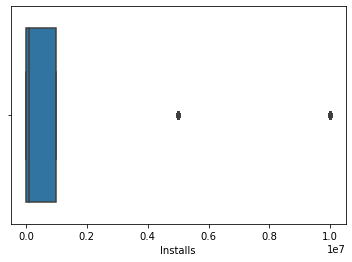

In [291]:
sns.boxplot(data['Installs'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

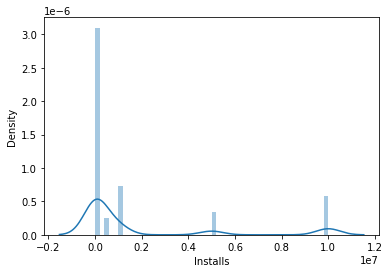

In [292]:
sns.distplot(data['Installs'])

In [293]:
data['Installs'].describe()

count    1.084100e+04
mean     1.694146e+06
std      3.251738e+06
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+07
Name: Installs, dtype: float64

In [376]:
data1['Installs']=np.log1p(data1['Installs'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

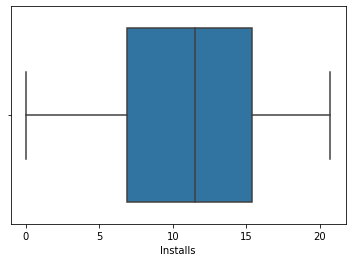

In [377]:
sns.boxplot(data1['Installs'])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

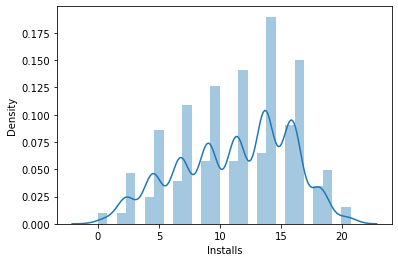

In [379]:
sns.distplot(data1['Installs'])

In [378]:
data1['Installs'].describe()

count    10841.000000
mean        11.248804
std          4.526869
min          0.000000
25%          6.908755
50%         11.512935
75%         15.424949
max         20.723266
Name: Installs, dtype: float64

### 3.5) MISSING VALUES CHECK

In [294]:
data.isna().any()

App               False
Category           True
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating    False
Genres             True
Last Updated      False
Current Ver        True
Android Ver        True
Year              False
Month             False
dtype: bool

In [295]:
data.isna().sum()

App                  0
Category             1
Rating            1978
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Year                 0
Month                0
dtype: int64

#### Rating,Type,Content Rating,Current Ver and Android Ver have missing values 